# Spur Gear Design Fundamentals
By: Christophe Garant, 5/25/2020

A notebook detailing basic spur gear design fundamentals in python.

### Table of Contents
- [Reference](#Reference)
- [Nomenclature](#Nomenclature)
- [Involute Curve](#Involute-Curve)
- [Design Example](#Design-Example)
- [Generating Involute Curve Points for CAD](#Generating-Involute-Curve-Points-for-CAD)

## References
1. Shigley's Mechanical Engineering Design, R. Budynas, J. Nisbett, 8th Ed, McGraw-Hill, 2008
2. Design and Analysis of Mechanisms, A Planar Approach, M. Rider PhD, Wiley, 2015

## Nomenclature

![Ref 1 Fig 13-5](images/01_spur_gear_nomenclature.jpg)


The `pitch circle` is a theoretical circle upon which all calculations are usually based; its diameter is the `pitch diameter`.

The `diametral pitch P` is the ratio of the number of teeth on the gear to the pitch diameter.  
$$P = \frac{N}{d}$$

The `module m` is the inverse, the ratio of the pitch diameter to the number of teeth. 
$$m = \frac{d}{N}$$

The `circular pitch p` is the distance, measured on the pitch circle, from a point on one tooth to a corresponding point on an adjacent tooth. (tooth thickness + width of space).
$$p = \frac{\pi d}{N} = \pi m  \\ pP=\pi$$

Where:  
P = diametral pitch, teeth per inch  
N = number of teeth  
d = pitch diameter, in  
m = module, in  
p = circular pitch  


The `addendum a` is the radial distance between the *top land* and the pitch circle.
$$a = \frac{1}{P}$$

The `dedendum b` is the radial distance from the *bottom land* to the pitch circle.
$$b = \frac{1.25}{P}$$

The `clearance circle` is a circle that is tangent to the addendum circle of the mating gear.  

The `clearance c` is the amount by which the dedendum in a given gear exceeds the addendum of the mating gear.  A good clearance is .125"

The `tooth thickness t` is half the circular pitch.
$$t = \frac{p}{2}$$

The `backlash` is the amount by which the width of a tooth space exceeds the thickness of the engaging tooth measured on the pitch cirlces.

The `center-to-center` is determined by taking the difference of the sum of the two gear diameters, or:
$$\frac{(d_1+d_2)}{2}$$

### Involute Curve

The `involute curve` is the path generated by a trace point on a cord as the cord is unwrapped from the base circle.  It is the ideal profile over which meshing gears maintain **conjugate action**, or constant contact and constant **angular-velocity ratio**.

The `base circle` is the circle on which the involute is generated.
$$r_b = r\cos(\phi)$$

The `pressure line, generating lines, or line of action` is the direction in which the resultant force acts between the gears, along the `pitch line` and `pressure angle`.  Pressure angle is typically 20 degrees.

## Design Example
d = 4, pitch circle diameter 
P = 4, diametral pitch (N/d)
N = 16, number of gear teeth
PA = 27, pressure angle

In [1]:
# imports
from numpy import pi, sin, cos, tan, deg2rad, arange
import numpy as np
import pandas as pd

In [2]:
#all dimensions in inches
d = 4  #pitch diameter
P = 4  #diametral pitch
N = round(P*d,3) #number of teeth
p = round(pi*d/N,3)
pa = 27 #[deg] common is 20, but going for exagerated
r_pitch= d/2 #pitch radius
r_base = round((r_pitch)*cos(deg2rad(pa)),3)
addendum = 1.00/P  #addendum
dedendum = 1.25/P  #dedendum
clearance = .125
r_addendum = r_pitch + addendum
r_dedendum = r_pitch - dedendum
r_clearance = r_pitch - dedendum + clearance
tooth_thickness = p/2 #circular pitch divided by two

In [3]:
#tooth thickness arc
s = tooth_thickness  #arc
r = r_pitch
theta_tooth_thickness_rad = s/r_pitch
theta_tooth_thickness_deg = round(np.rad2deg(theta_tooth_thickness_rad),3)
theta_tooth_thickness_lineofsymmetry_deg = theta_tooth_thickness_deg/2     #line of symmetry about which to mirrow the invlute curve

In [4]:
print('gear design input parameters:')
print('')
print(f'{d}, pitch diameter')
print(f'{P}, diametral pitch')
print(f'{N}, number of teeth')
print(f'{p}, circular pitch')
print(f'{pa}, pressure angle')
print('')
print('gear design output design parameters:')
print('')
print('design info:')
print(f'{addendum}, addendum, radial distance from pitch radius')
print(f'{dedendum}, dedendum, radial distance from pitch radius')
print(f'{clearance}, clearance')
print('')
print('radii info:')
print(f'{r_pitch}, pitch radius')
print(f'{r_base}, base radius')
print(f'{r_addendum}, addendum radius')
print(f'{r_dedendum}, dedendum radius')
print(f'{r_clearance}, clearance radius')
print('')
print('tooth thickness info:')
print(f'{tooth_thickness}, tooth thickness')
print(f'{theta_tooth_thickness_deg} tooth thickness angle [deg]')
print(f'{theta_tooth_thickness_lineofsymmetry_deg} tooth thickness line of symmetry [deg]')

gear design input parameters:

4, pitch diameter
4, diametral pitch
16, number of teeth
0.785, circular pitch
27, pressure angle

gear design output design parameters:

design info:
0.25, addendum, radial distance from pitch radius
0.3125, dedendum, radial distance from pitch radius
0.125, clearance

radii info:
2.0, pitch radius
1.782, base radius
2.25, addendum radius
1.6875, dedendum radius
1.8125, clearance radius

tooth thickness info:
0.3925, tooth thickness
11.244 tooth thickness angle [deg]
5.622 tooth thickness line of symmetry [deg]


## Generating Involute Curve Points for CAD

![involute_curve](images/02_involute_curve_depiction.jpg)

How do you create an involute curve in CAD?  

One simple approach (though tedious) is to create points tangent to the base circle at different angle intervals, just like pulling a chord off the circumferece.

This can be calculated simply by:
$$s=\theta_{radians}*r_{base}$$

In [11]:
#Involute Curve
theta_deg = arange(0,70,5)  #0 to 70 degress in 5 degree intervals
theta_rad = np.deg2rad(theta_deg)
s = theta_rad*r_base

theta_deg = list(theta_deg)
theta_rad = list(theta_rad)
s = list(s)

inv = pd.DataFrame(index=theta_deg, columns=['theta_rad','s arc length'])
inv.index.name = 'theta_deg'

inv['theta_rad'] = theta_rad
inv['s arc length'] = s

inv

,theta_rad,s arc length
theta_deg,,
0,0.000000,0.000000
5,0.087266,0.155509
10,0.174533,0.311018
15,0.261799,0.466527
20,0.349066,0.622035
25,0.436332,0.777544
30,0.523599,0.933053
35,0.610865,1.088562
40,0.698132,1.244071


In CATIA, the `s arc length` points were plotted tangent to the base diameter, at different `theta_deg` degree increments.

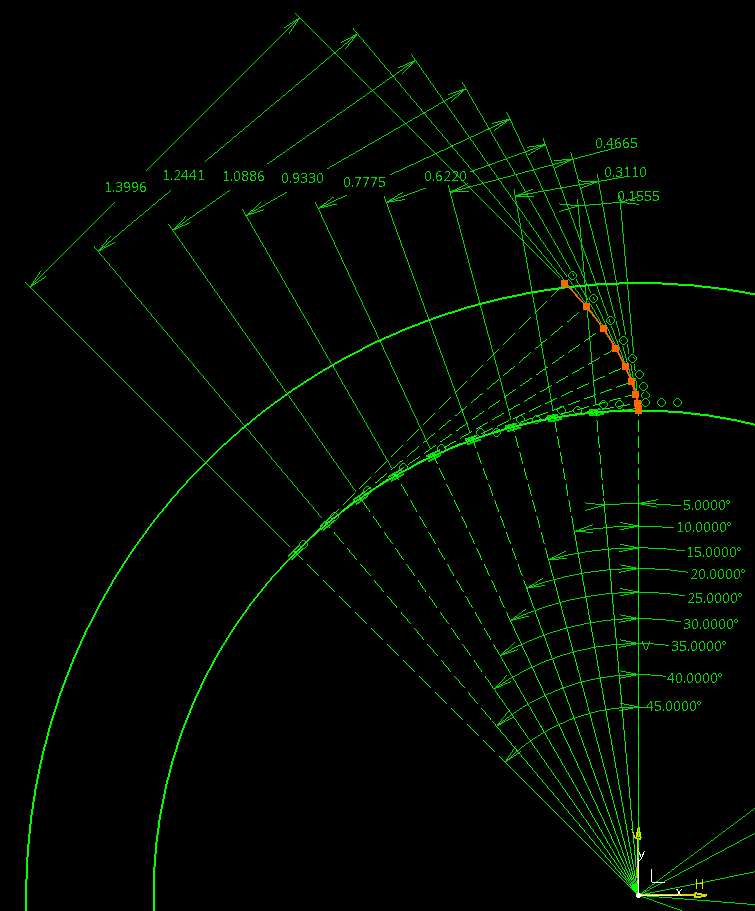

Use the tooth thickness along the pitch circle to generate a mirroring involve curve line.  From this sketch, make a part pad.

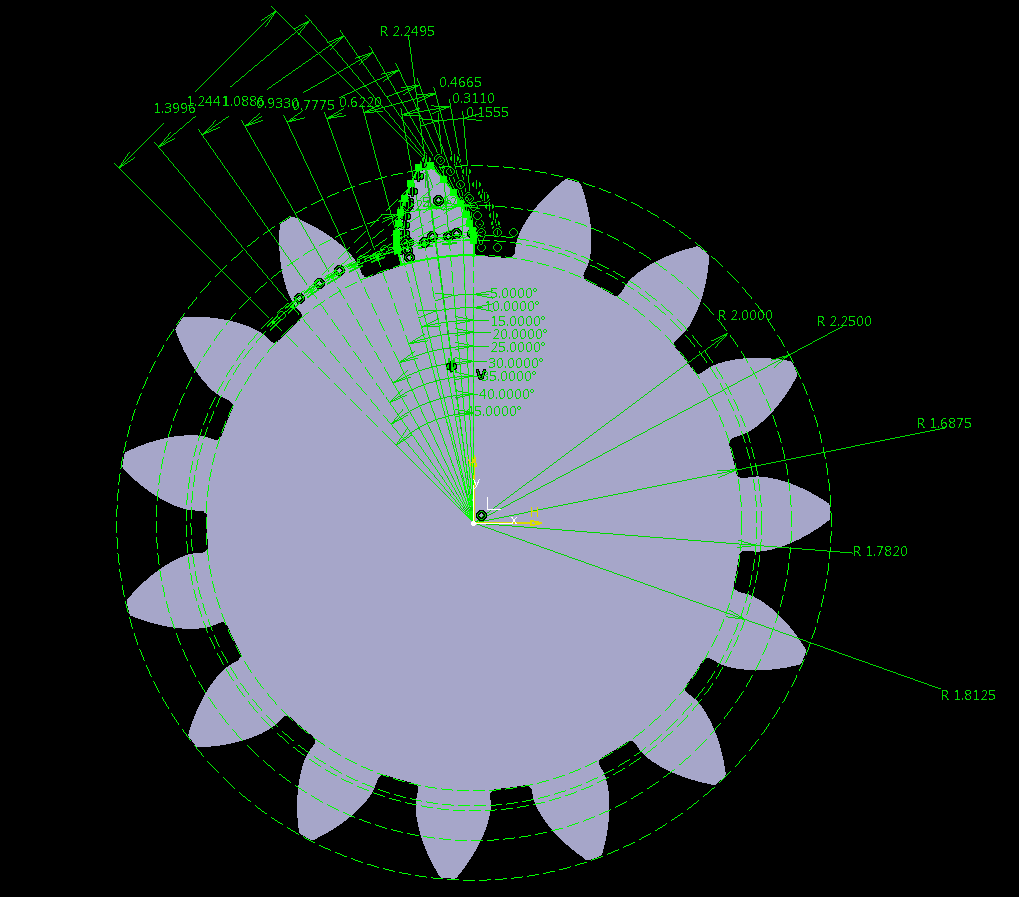

The gear teeth profile relative to the design generating circles (dedendum, base, pitch, addendum) should look something like this.

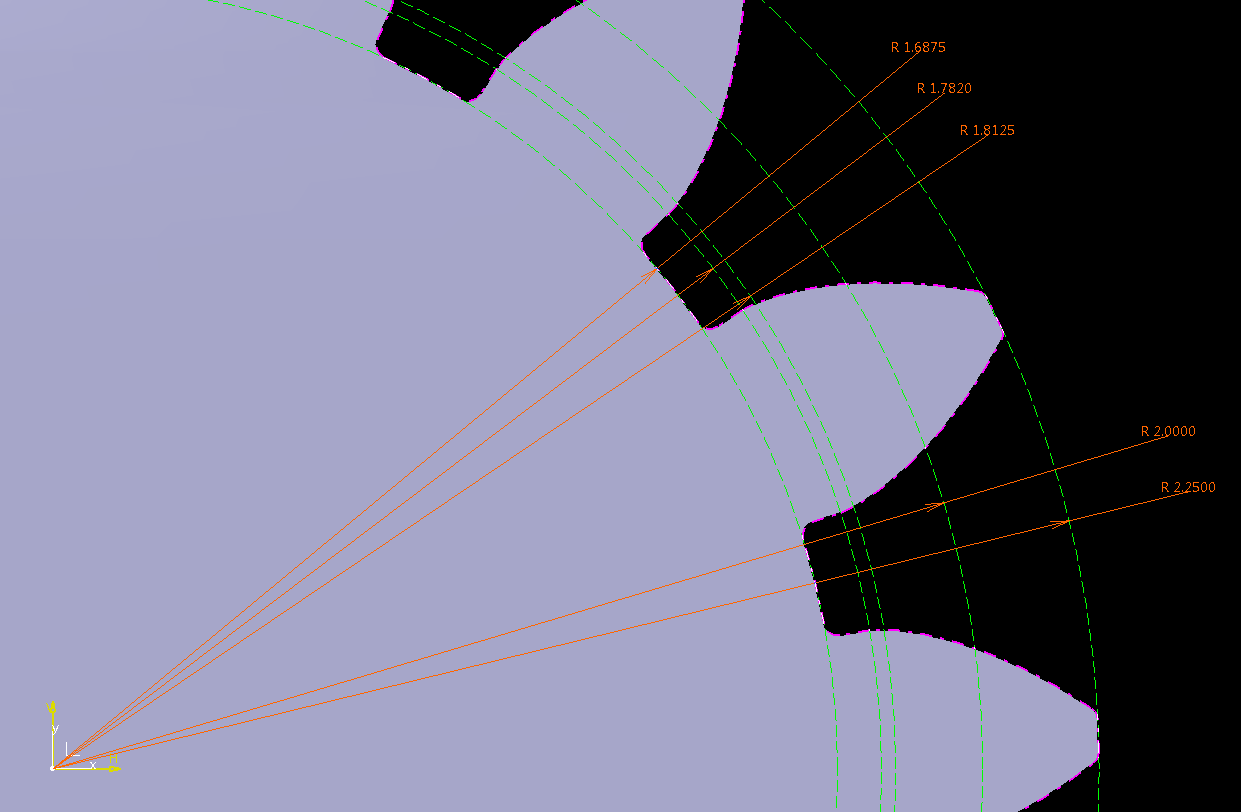

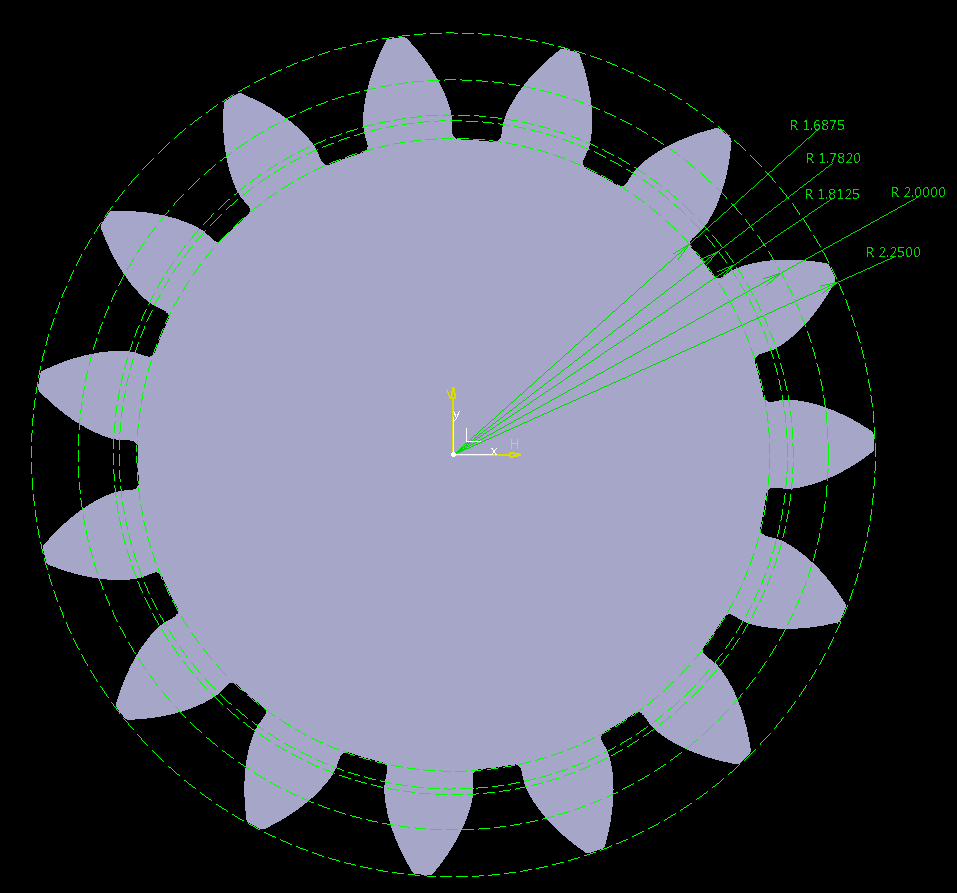

This final parts should look something like this.

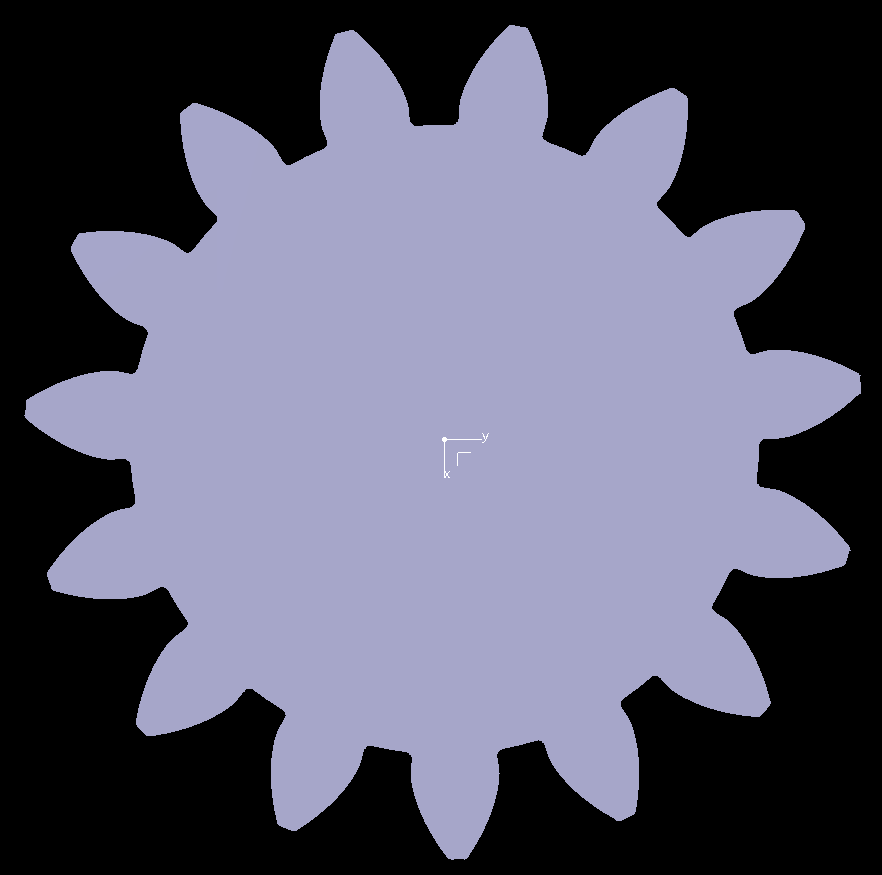

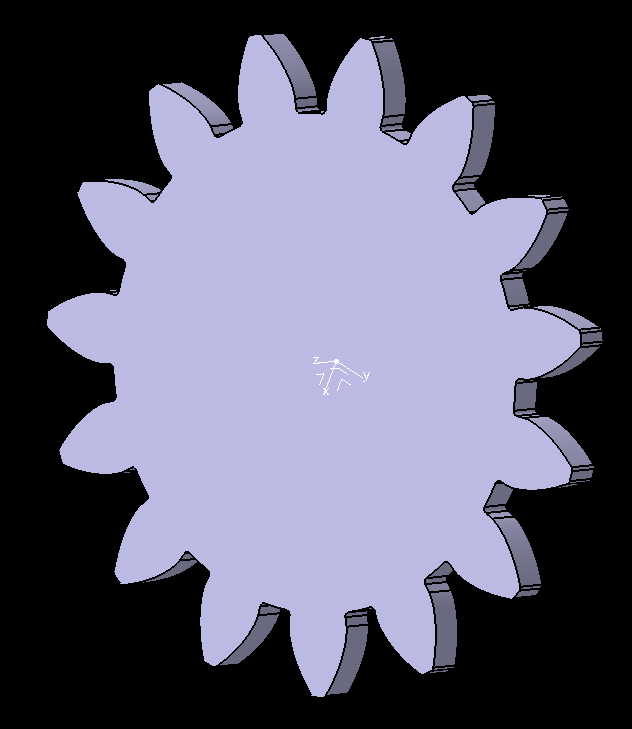

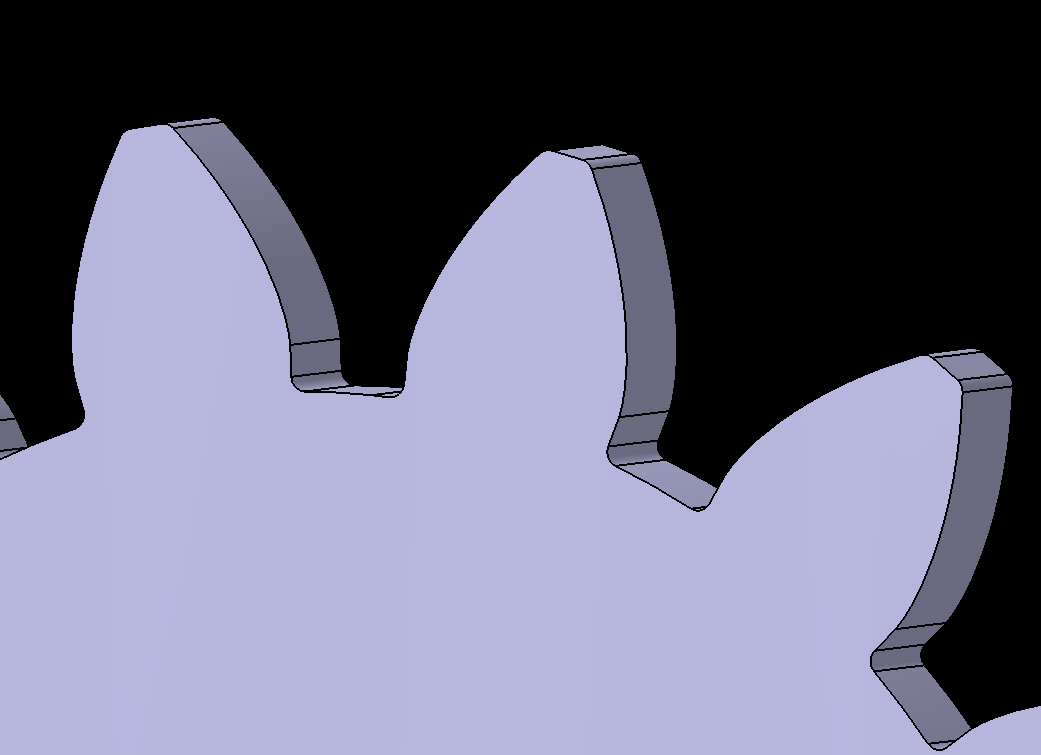